# *Gender Bias in Virtual Assistants Project*

### Identificando Preconceitos de Gênero em Assistentes Virtuais

![From Google](https://media-assets-01.thedrum.com/cache/images/thedrum-prod/s3-news-tmp-145694-untitled_design_70--default--1280.png)

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210

# BERT *Classifier for ConvIA2 Dataset*





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Packages

In [2]:
!pip install scikit-multilearn
!pip install transformers
!pip install tensorflow-addons
!pip install keras-tqdm
!pip install livelossplot

# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow_addons.metrics import F1Score

from sklearn.metrics import classification_report

BASE_PATH = '/content/drive/MyDrive/Ciência de Dados/Projeto Final'
DATASETS_PATH = BASE_PATH + "/Resources/Datasets"

In [4]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/Modules')

import utils, text, model
from importlib import reload

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.88.14.242:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.88.14.242:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Leitura dos Dados

In [5]:
df = pd.read_csv(DATASETS_PATH + '/MDGender/md_gender_bias/convai2_inferred/new_data.csv')
df = df.sample(n=50000, random_state=42)

df.head()

,text,binary_label,binary_score,ternary_label,ternary_score,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore,labels_enc,label_pos_0,label_pos_1,label_pos_2
79407,i am good . just looking at my antiques .,1,0.5068,neutral,0.4622,"['good', 'looking', 'antiques']",i am good just looking at my antiques,8,good looking antiques,2,0.0,0.0,1.0
12001,"i don't mind , but i just happen to live a few...",0,0.9509,male,0.9076,"['dont', 'mind', 'happen', 'live', 'houses', '...",i dont mind but i just happen to live a few ho...,16,dont mind happen live houses miley cyrus,1,0.0,1.0,0.0
5709,why are you nervous ? are you looking for some...,0,0.6219,male,0.3930,"['nervous', 'looking', 'like']",why are you nervous are you looking for someon...,12,nervous looking like,1,0.0,1.0,0.0
42688,that is good are you in college or high school,0,0.5238,male,0.3609,"['good', 'college', 'high', 'school']",that is good are you in college or high school,10,good college high school,1,0.0,1.0,0.0
83527,i work for an insurance company . would you wa...,1,0.6509,female,0.3839,"['work', 'insurance', 'company', 'want', 'some...",i work for an insurance company would you want...,13,work insurance company want someday,0,1.0,0.0,0.0


In [6]:
labels = ['female', 'male', 'neutral']

# Treinamento do BERT *Classifier*

## Representação Textual

In [7]:
padded_tokens_ids, padded_masked_ids = text.padding_sequences(df['clean_text'].to_numpy(), 
                                                              max_length=text.MAX_LENGTH)


Text to sequences for BERT Classifier:   0%|          | 0/50000 [00:00<?, ?it/s]

Padding the sequences...


In [8]:
padded_tokens_ids.shape, padded_masked_ids.shape

((50000, 60), (50000, 60))

## Divisão Estratificada

In [9]:
dict_padded_tokens_ids = {k: v for k, v in enumerate(padded_tokens_ids)}
dict_padded_masked_ids = {k: v for k, v in enumerate(padded_masked_ids)}

y = df[['label_pos_0', 'label_pos_1', 'label_pos_2']].to_numpy()

X_train_ids, y_train, X_test_ids, y_test, X_dev_ids, y_dev = text.data_split(padded_tokens_ids, y, test_size=0.2, dev_size=0.1, random_seed=42)

(X_train_ids.shape, y_train.shape), (X_test_ids.shape, y_test.shape), (X_dev_ids.shape, y_dev.shape)

(((36001, 60), (36001, 3)), ((10000, 60), (10000, 3)), ((3999, 60), (3999, 3)))

In [10]:
X_train_masks = np.array([dict_padded_masked_ids[i] for i in utils.get_keys_by_values(dict_padded_tokens_ids, X_train_ids)])
X_test_masks = np.array([dict_padded_masked_ids[i] for i in utils.get_keys_by_values(dict_padded_tokens_ids, X_test_ids)])
X_dev_masks = np.array([dict_padded_masked_ids[i] for i in utils.get_keys_by_values(dict_padded_tokens_ids, X_dev_ids)])

X_train_masks.shape, X_test_masks.shape, X_dev_masks.shape

((36001, 60), (10000, 60), (3999, 60))

In [11]:
from collections import Counter
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

result_comb_matrix = pd.DataFrame({
    'data': Counter(str(combination) for row in get_combination_wise_output_matrix(y, order=1) for combination in row),
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row),
    'dev' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_dev, order=1) for combination in row)
}).T.fillna(0.0)

result_comb_matrix.style.background_gradient(cmap=plt.get_cmap('Pastel2'))

,"(2,)","(1,)","(0,)"
data,22526,14006,13468
train,16219,10085,9697
test,4505,2801,2694
dev,1802,1120,1077


In [12]:
test_data = pd.DataFrame(columns=['tokens_ids', 'masked_ids', 'y'])

for ids, masks, y in zip(X_test_ids, X_test_masks, y_test):
  test_data = test_data.append({
      'tokens_ids': ids,
      'masked_ids': masks,
      'y': y
  }, ignore_index=True)

test_data.to_json(DATASETS_PATH + '/MDGender/md_gender_bias/convai2_inferred/padded_test_data.json', orient='records')

## Treino do Modelo

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

auc_score = AUC(multi_label=True)
# f1_score = F1Score(num_classes=y.shape[1], threshold=0.5, average='weighted')

model_path = BASE_PATH + '/Resources/Models/best_bert_linear_classifier2_convai2.h5'

model_meta = model.run_text_classifier(model.bert_linear_classifier2,
                                       [X_train_ids, X_train_masks], y_train,
                                       [X_dev_ids, X_dev_masks], y_dev,
                                       batch_size=32,
                                       max_epochs=50,
                                       patience=10,
                                       eval_metric=auc_score,
                                       monitor='val_auc',
                                       source_length=text.MAX_LENGTH,
                                       hidden_units=128,
                                       labels_size=len(labels), 
                                       model_path=model_path)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
tf_bert_for_sequence_classifica TFSequenceClassifier 109483778   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          384         tf_bert_for_sequence_classifi

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 3) dtype=float32>]


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 3) dtype=float32>]


   6/1126 [..............................] - ETA: 1:15 - loss: 0.6896 - auc: 0.5220WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0080s vs `on_train_batch_end` time: 8.2425s). Check your callbacks.


1126/1126 [==============================] - ETA: 0s - loss: 0.4270 - auc: 0.8714

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 3) dtype=float32>]


1126/1126 [==============================] - 215s 120ms/step - loss: 0.4270 - auc: 0.8714 - val_loss: 0.3183 - val_auc: 0.9291

Epoch 00001: val_auc improved from -inf to 0.92913, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_bert_linear_classifier2_convai2.h5
Epoch 2/50
1126/1126 [==============================] - 79s 70ms/step - loss: 0.2350 - auc: 0.9605 - val_loss: 0.3050 - val_auc: 0.9354

Epoch 00002: val_auc improved from 0.92913 to 0.93536, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_bert_linear_classifier2_convai2.h5
Epoch 3/50
1126/1126 [==============================] - 80s 71ms/step - loss: 0.1431 - auc: 0.9848 - val_loss: 0.3186 - val_auc: 0.9355

Epoch 00003: val_auc improved from 0.93536 to 0.93546, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_bert_linear_classifier2_convai2.h5
Epoch 4/50
1126/1126 [==============================

In [14]:
model_meta['run_time'], model_meta['start'], model_meta['final']

('00:18:05', '17/08/2021 14:18', '17/08/2021 14:36')

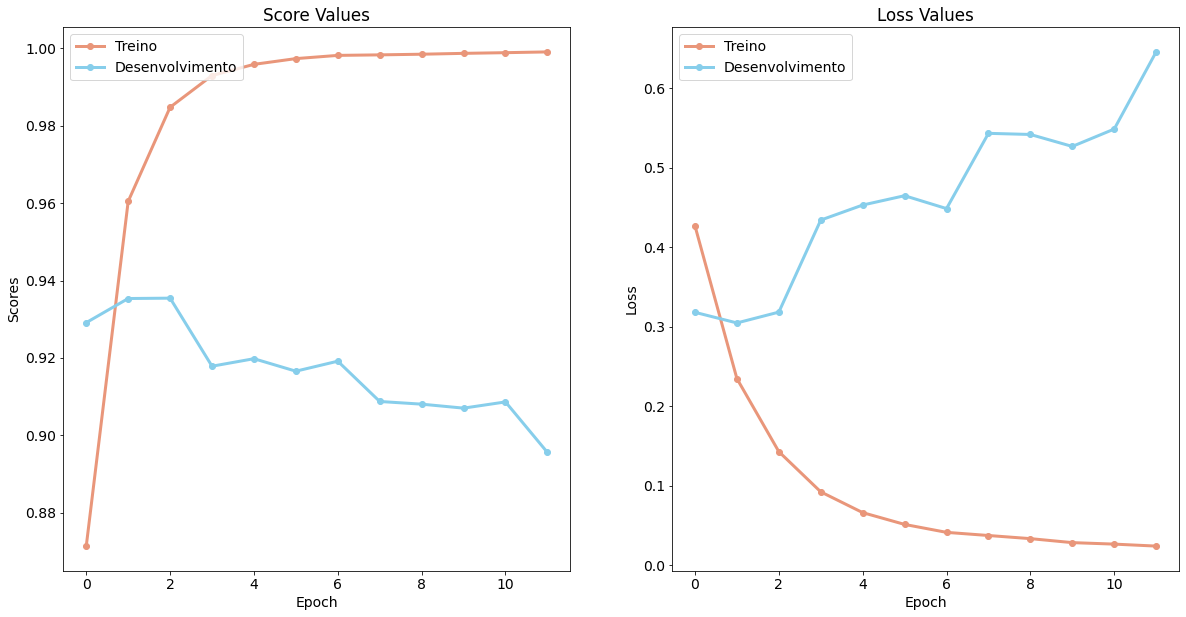

In [15]:
model.plot_model_loss_score(model_meta['history'], score_name='auc')

In [16]:
model_meta['model'].load_weights(model_path)
y_pred = np.rint(model_meta['model'].predict([X_test_ids, X_test_masks]))

print(classification_report(y_test, y_pred, target_names=labels))

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=int32>]


              precision    recall  f1-score   support

      female       0.74      0.78      0.76      2694
        male       0.80      0.77      0.79      2801
     neutral       0.83      0.84      0.84      4505

   micro avg       0.80      0.81      0.80     10000
   macro avg       0.79      0.80      0.80     10000
weighted avg       0.80      0.81      0.80     10000
 samples avg       0.80      0.81      0.80     10000

